In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [43]:
data = pd.read_csv('wine_dataset.csv')

In [44]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [45]:
# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [46]:
X

array([[ 7.4 ,  0.7 ,  0.  , ...,  0.56,  9.4 ,  5.  ],
       [ 7.8 ,  0.88,  0.  , ...,  0.68,  9.8 ,  5.  ],
       [ 7.8 ,  0.76,  0.04, ...,  0.65,  9.8 ,  5.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]])

In [47]:
y

array(['red', 'red', 'red', ..., 'white', 'white', 'white'], dtype=object)

In [48]:
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

In [49]:
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, ...,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.79795816,
        -0.58006813, -0.93722961],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -0.47897144,
        -0.91546416,  0.20799905],
       [-1.32319841, -0.30169391, -0.12823371, ..., -1.016626  ,
         1.9354021 ,  1.35322771],
       [-0.93749534, -0.78765037,  0.42232597, ..., -1.41986693,
         1.09691202,  0.20799905]])

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [51]:
principalComponents

array([[-3.34843817,  0.56892617],
       [-3.22859545,  1.19733465],
       [-3.23746833,  0.95258001],
       ...,
       [ 0.62692235, -0.62214478],
       [ 0.49193416, -3.75592792],
       [ 0.76155534, -2.7678397 ]])

Text(0, 0.5, 'cumulative explained variance')

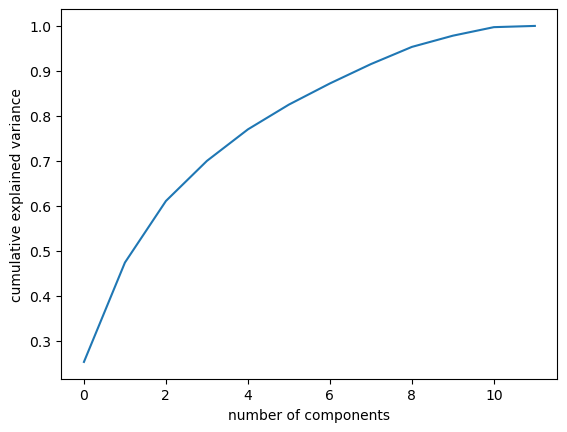

In [52]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

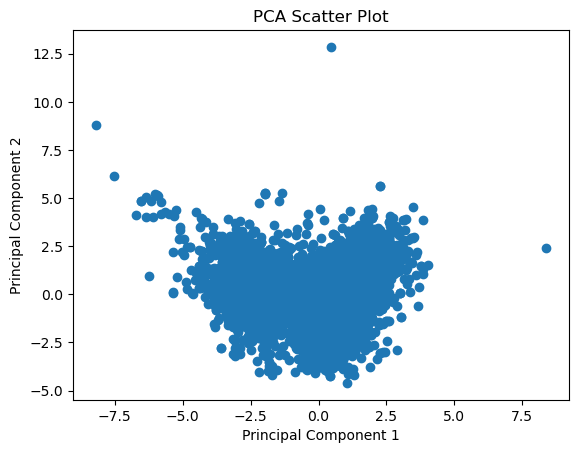

In [53]:
import matplotlib.pyplot as plt

plt.scatter(principalComponents[:, 0], principalComponents[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
plt.show()

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(principalComponents)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

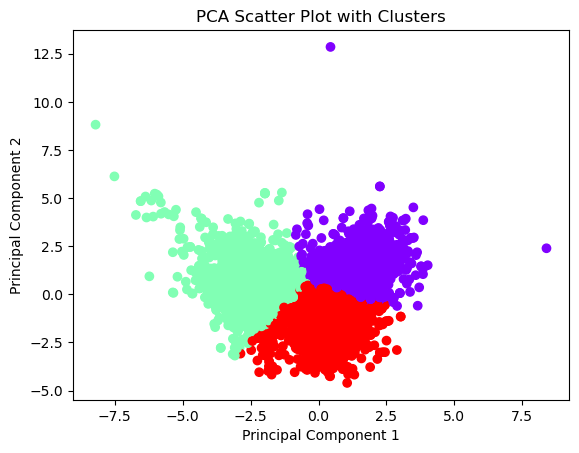

In [55]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot with Clusters')
plt.show()